## 1) Load Libraries

In [ ]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

## 2) Load Dataset

In [2]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    # Filter data based on STOPWORDS
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [3]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 3) Plot Distribution of Articles across Labels

In [4]:
LABELS = ['altatheism', 'compgraphics', 'composmswindowsmisc', 'compsysibmpchardware', 'compsysmachardware', 'compwindowsx', 'miscforsale', 'recautos', 'recmotorcycles', 'recsportbaseball',
              'recsporthockey', 'scicrypt', 'scielectronics', 'scimed', 'scispace', 'socreligionchristian', 'talkpoliticsguns', 'talkpoliticsmideast', 'talkpoliticsmisc', 'talkreligionmisc']

In [5]:
labels = pd.DataFrame(labels_new)
new = pd.DataFrame(0, index=np.arange(len(labels)), columns=LABELS)

In [6]:
new['recmotorcycles'] = np.where(labels == 'recmotorcycles', 1, 0)
new['recsportbaseball'] = np.where(labels == 'recsportbaseball', 1, 0)
new['recsporthockey'] = np.where(labels == 'recsporthockey', 1, 0)
new['scicrypt'] = np.where(labels == 'scicrypt', 1, 0)
new['scielectronics'] = np.where(labels == 'scielectronics', 1, 0)
new['scimed'] = np.where(labels == 'scimed', 1, 0)
new['scispace'] = np.where(labels == 'scispace', 1, 0)
new['socreligionchristian'] = np.where(labels == 'socreligionchristian', 1, 0)
new['talkpoliticsguns'] = np.where(labels == 'talkpoliticsguns', 1, 0)
new['talkpoliticsmideast'] = np.where(labels == 'talkpoliticsmideast', 1, 0)
new['talkpoliticsmisc'] = np.where(labels == 'talkpoliticsmisc', 1, 0)
new['talkreligionmisc'] = np.where(labels == 'talkreligionmisc', 1, 0)
new['recautos'] = np.where(labels == 'recautos', 1, 0)
new['altatheism'] = np.where(labels == 'altatheism', 1, 0)
new['compgraphics'] = np.where(labels == 'compgraphics', 1, 0)
new['composmswindowsmisc'] = np.where(labels == 'composmswindowsmisc', 1, 0)
new['compsysibmpchardware'] = np.where(labels == 'compsysibmpchardware', 1, 0)
new['compsysmachardware'] = np.where(labels == 'compsysmachardware', 1, 0)
new['compwindowsx'] = np.where(labels == 'compwindowsx', 1, 0)
new['miscforsale'] = np.where(labels == 'miscforsale', 1, 0)

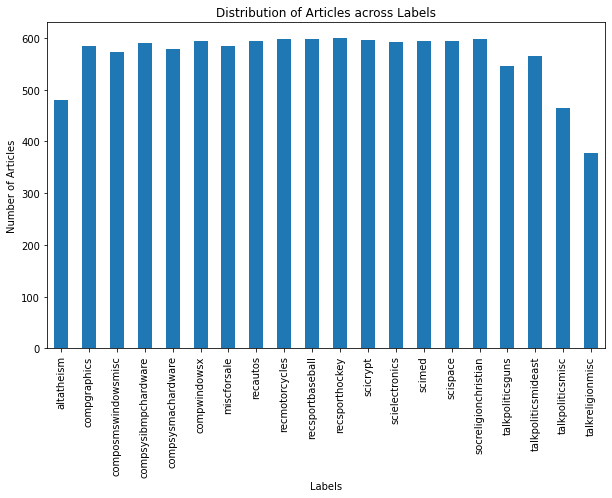

In [7]:
# Plot label data
plt.figure(figsize=(10,6))
new.sum(axis=0).plot.bar()
plt.xlabel("Labels")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles across Labels")
plt.show()

## 4) Split data into 80% training and 20% validation datasets

In [8]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [9]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

7905
7905
3388
3388


## 5) Lemmatization and Vectorization

In [10]:
"""This class uses WordNetLemmatizer to stem words with length more than two"""
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2]

In [11]:
# Load CountVectorizer API
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content', analyzer='word', tokenizer=LemmaTokenizer(), max_features=2000)

In [12]:
# Convert Articles to their vector sparse representation
X_train_cv = cv.fit_transform(train_articles)
X_test_cv = cv.transform(validation_articles)

## 6) Model Building

In [30]:
#Train the model
naive_bayes = MultinomialNB(alpha=1)
start_time = time.time()
naive_bayes.fit(X_train_cv, train_labels)
print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Done. Time elapsed: 0.04s


In [15]:
#Predict labels for validation dataset via trained model
start_time = time.time()
predictions = naive_bayes.predict(X_test_cv)
print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Done. Time elapsed: 0.01s


In [22]:
# Save model
f = open('naive_bayes.pickle', 'wb')
pickle.dump(naive_bayes, f)
f.close()

In [23]:
# f = open('naive_bayes.pickle', 'rb')
# classifier = pickle.load(f)
# f.close()
predictions

array(['talkpoliticsmideast', 'talkpoliticsguns', 'scispace', ...,
       'scimed', 'socreligionchristian', 'recsportbaseball'], dtype='<U20')

## 7) Model Evaluation

In [17]:
print('Accuracy score: ', accuracy_score(validation_labels, predictions))
print('Precision score: ', precision_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('Recall score: ', recall_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('F1 score: ', f1_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))

Accuracy score:  0.8060802833530106
Precision score:  0.8084076391837113
Recall score:  0.8060802833530106
F1 score:  0.8060420295082048


In [24]:
from sklearn.metrics import classification_report
print(classification_report(validation_labels, predictions, target_names=LABELS))

                      precision    recall  f1-score   support

          altatheism       0.75      0.78      0.76       144
        compgraphics       0.69      0.70      0.69       175
 composmswindowsmisc       0.67      0.79      0.72       172
compsysibmpchardware       0.73      0.62      0.67       177
  compsysmachardware       0.67      0.73      0.70       173
        compwindowsx       0.89      0.77      0.83       178
         miscforsale       0.80      0.78      0.79       176
            recautos       0.84      0.80      0.82       178
      recmotorcycles       0.83      0.88      0.86       179
    recsportbaseball       0.91      0.90      0.91       179
      recsporthockey       0.94      0.94      0.94       180
            scicrypt       0.93      0.87      0.90       179
      scielectronics       0.74      0.72      0.73       177
              scimed       0.86      0.88      0.87       178
            scispace       0.86      0.89      0.87       178
socreli

## 8) Create Synthetic Data

In [ ]:
# Fetch feature parameters from trained model
predictions_prob = naive_bayes.predict_log_proba(X_test_cv)
beta = naive_bayes.feature_log_prob_
classes = naive_bayes.classes_
word_freq = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())

In [26]:
# Adding label names to word log probability distribution
beta_lables = pd.DataFrame(data=beta, index=classes)
beta_lables

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
altatheism,-9.804799,-7.553507,-8.418505,-6.887028,-8.013040,-10.497946,-10.497946,-10.497946,-5.779447,-8.888508,-7.932997,-7.725358,-7.932997,-8.100051,-8.888508,-8.706187,-9.804799,-9.111652,-6.180458,-6.546703,-7.279071,-8.418505,-9.111652,-8.013040,-9.111652,-7.858889,-8.013040,-7.789896,-10.497946,-9.111652,-7.202109,-8.195361,-8.888508,-10.497946,-9.399334,-8.888508,-8.100051,-9.804799,-8.706187,-7.858889,...,-9.804799,-6.293254,-8.300722,-8.418505,-10.497946,-9.111652,-9.399334,-8.195361,-10.497946,-9.399334,-9.804799,-9.111652,-10.497946,-7.453424,-6.546703,-8.100051,-5.710455,-6.354812,-10.497946,-6.221280,-8.195361,-6.809067,-7.362452,-8.706187,-8.100051,-9.804799,-4.429521,-7.858889,-6.914427,-5.882826,-6.437503,-10.497946,-8.100051,-6.278439,-9.804799,-9.399334,-6.914427,-7.932997,-9.804799,-10.497946
compgraphics,-8.006451,-8.545447,-9.798210,-9.392745,-9.798210,-8.294133,-8.411916,-8.545447,-7.355863,-6.802478,-9.798210,-9.105063,-9.392745,-10.491358,-9.798210,-10.491358,-8.881920,-7.926408,-9.105063,-8.699598,-8.294133,-9.105063,-7.546919,-8.411916,-8.411916,-7.600986,-7.718769,-6.002721,-8.006451,-8.881920,-9.105063,-6.316970,-7.718769,-10.491358,-8.545447,-9.798210,-9.105063,-10.491358,-9.392745,-9.105063,...,-9.105063,-7.718769,-7.446835,-7.400315,-7.600986,-10.491358,-8.699598,-8.699598,-5.528513,-10.491358,-9.798210,-8.188772,-10.491358,-8.545447,-8.881920,-7.658144,-7.355863,-5.460920,-6.880440,-6.853771,-8.881920,-8.699598,-10.491358,-9.798210,-8.006451,-10.491358,-4.907861,-9.105063,-6.730157,-7.658144,-6.880440,-9.392745,-9.105063,-6.579335,-8.881920,-8.188772,-7.658144,-8.881920,-6.684695,-10.491358
composmswindowsmisc,-10.051563,-7.653667,-10.051563,-8.442125,-9.358415,-7.653667,-10.051563,-7.653667,-7.566656,-5.529774,-10.051563,-6.960520,-8.952950,-10.051563,-9.358415,-9.358415,-10.051563,-7.972121,-8.259803,-9.358415,-8.105653,-7.278974,-7.412505,-8.665268,-7.566656,-7.218349,-7.486613,-6.222921,-8.442125,-8.665268,-8.105653,-6.201415,-7.486613,-8.105653,-8.105653,-10.051563,-8.952950,-8.259803,-9.358415,-8.105653,...,-10.051563,-6.617575,-7.854338,-8.665268,-9.358415,-10.051563,-8.665268,-4.799289,-3.285371,-8.442125,-9.358415,-9.358415,-10.051563,-10.051563,-9.358415,-6.719358,-6.684267,-5.146288,-7.653667,-6.719358,-8.665268,-7.972121,-10.051563,-7.972121,-7.218349,-10.051563,-4.583503,-8.665268,-7.653667,-6.793466,-6.960520,-8.665268,-8.105653,-6.793466,-9.358415,-8.665268,-7.653667,-8.952950,-6.244900,-10.051563
compsysibmpchardware,-10.281924,-7.884029,-8.895630,-9.183312,-9.588777,-8.336014,-10.281924,-7.391552,-7.509335,-6.154790,-10.281924,-8.202482,-8.672486,-10.281924,-10.281924,-10.281924,-9.183312,-7.642867,-7.797017,-9.588777,-7.642867,-8.084699,-7.337485,-8.895630,-7.023827,-7.190882,-7.716975,-6.311632,-7.797017,-10.281924,-9.588777,-5.991465,-7.797017,-7.884029,-7.286192,-10.281924,-8.336014,-9.183312,-9.588777,-10.281924,...,-10.281924,-7.190882,-8.672486,-6.726576,-10.281924,-10.281924,-8.336014,-7.103870,-5.369269,-8.672486,-9.588777,-7.391552,-9.588777,-9.588777,-9.588777,-7.448711,-7.448711,-4.998720,-7.979339,-7.190882,-9.588777,-8.336014,-10.281924,-8.672486,-7.337485,-10.281924,-4.925338,-8.895630,-8.084699,-7.190882,-6.618362,-10.281924,-7.797017,-6.880727,-8.895630,-10.281924,-7.337485,-9.183312,-8.490165,-8.672486
compsysmachardware,-10.175193,-8.229283,-8.565755,-8.229283,-10.175193,-8.383433,-10.175193,-6.223949,-8.229283,-6.325045,-10.175193,-8.229283,-9.076580,-10.175193,-9.076580,-10.175193,-10.175193,-8.095751,-8.383433,-8.229283,-7.536135,-8.788898,-7.084150,-7.777297,-6.263170,-6.956317,-7.039698,-6.678685,-8.229283,-9.076580,-9.482045,-6.564275,-7.7772

In [27]:
# Vocabulary details
vocabulary = word_freq.columns.values.tolist()
len(vocabulary)

2000

In [28]:
"""This function picks random words for randomly selected articles by using multinomial distribution"""
def text_gen(vocabulary, word_distribution, word_distribution_labels):
  words = []
  docs = []
  idx = int(np.random.randint(20, size=1))
  docs.append(word_distribution_labels.index[idx])
  word_proportions = np.random.multinomial(2000, np.exp(word_distribution[idx]))
  for _ in range(500):
    words.append(random.choices(vocabulary, word_proportions)[0])
  return words, docs

In [29]:
# Generate 3000 articles
documents = [
        text_gen(vocabulary, beta, beta_lables)
        for _ in range(3000)
    ]

In [31]:
# Modify generated data to match the format of original dataset
synthetic_data = [''.join(i[1]) + '\t' + ' '.join(i[0]) for i in documents]
synthetic_data[:10]

['compsysmachardware\tsimm end anoth edu wonder articl appl nubu troubl multipl context thi main expert stick last bo deal hardwar simm troubl white polici price compat edu app qualiti articl support replac blue drive appl manufactur fpu becom port sleep thi path nubu quadra lack troubl write feed built microsoft interfac comput hardwar slot run jon cat david memori doug gener experienc univers recent final doc for plug connect pin provid explan test good option filter call servic quit end bit berkelei internet recent question line low ram expert write case connect fast replac solid slightli scsi cabl run receiv soni comput nubu upgrad fpu socket bit uiuc cabl two card compat comput appl left chip version sec wrong mark origin smaller enjoi built memori bit monitor convict good hard spec come system cach recent work problem make stuff edu manag board info special terribl rock remov navi polici built dept alt dealer extern qualiti good memori last pictur clock dougla excus rest machin u

In [33]:
# Write synthetic dataset to text file
with open("synthetic_data_v2.txt", mode="w") as outfile:
    for s in synthetic_data:
        outfile.write("%s\n" % s)